<a href="https://colab.research.google.com/github/hifistelija/ML_Model_Selection/blob/main/ML_Model_paramtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kirjastojen tuonti

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tyhjien rivien poisto

In [ ]:
# df = pd.read_excel("ML_Määrät_2.xlsx")
df = pd.read_excel("ML_Määrät.xlsx")

In [ ]:
df.head()

,Kirjauspvm.,Päivän nimi,Nimikkeen nro,Kuvaus,Linjakoodi,Varaukset,Määrä,Perusmittayksikkö
0,2023-06-18,Sunnuntai,R01871,Nordqvist Tee valikoima,73,314.0,1.0,KPL
1,2023-06-18,Sunnuntai,R01842,Kinkkureissari itsetehty RV,73,314.0,6.0,KPL
2,2023-06-18,Sunnuntai,70864,Dumle Crunchy Salted Caramel,73,314.0,2.0,KPL
3,2023-06-18,Sunnuntai,70177,Pringles Original,73,314.0,4.0,KPL
4,2023-06-18,Sunnuntai,40169,Karhu III hana-olut p,73,314.0,6.5,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111615 entries, 0 to 111614
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Kirjauspvm.        111615 non-null  datetime64[ns]
 1   Päivän nimi        111615 non-null  object        
 2   Nimikkeen nro      111615 non-null  object        
 3   Kuvaus             111615 non-null  object        
 4   Linjakoodi         111615 non-null  int64         
 5   Varaukset          110979 non-null  float64       
 6   Määrä              111615 non-null  float64       
 7   Perusmittayksikkö  111615 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.8+ MB


In [ ]:
df.isnull()

,Kirjauspvm.,Päivän nimi,Nimikkeen nro,Kuvaus,Linjakoodi,Varaukset,Määrä,Perusmittayksikkö
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
111610,False,False,False,False,False,False,False,False
111611,False,False,False,False,False,False,False,False
111612,False,False,False,False,False,False,False,False
111613,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Kirjauspvm.            0
Päivän nimi            0
Nimikkeen nro          0
Kuvaus                 0
Linjakoodi             0
Varaukset            636
Määrä                  0
Perusmittayksikkö      0
dtype: int64

In [ ]:
100 * df.isnull().sum() / len(df)

Kirjauspvm.          0.000000
Päivän nimi          0.000000
Nimikkeen nro        0.000000
Kuvaus               0.000000
Linjakoodi           0.000000
Varaukset            0.569816
Määrä                0.000000
Perusmittayksikkö    0.000000
dtype: float64

In [ ]:
def percent_missing(df):
  percent_nan = 100 * df.isnull().sum() / len(df)
  percent_nan = percent_nan[percent_nan > 0].sort_values()
  return percent_nan

In [ ]:
percent_nan = percent_missing(df)

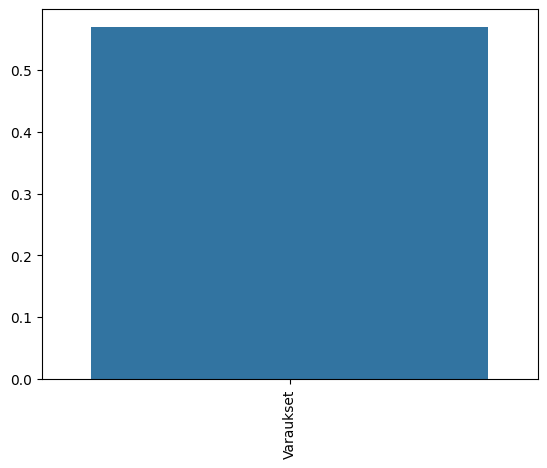

In [ ]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [ ]:
df[df["Varaukset"].isnull()]

,Kirjauspvm.,Päivän nimi,Nimikkeen nro,Kuvaus,Linjakoodi,Varaukset,Määrä,Perusmittayksikkö
2560,2023-06-18,Sunnuntai,R01842,Kinkkureissari itsetehty RV,203,NaN,1.0,KPL
2561,2023-06-18,Sunnuntai,40169,Karhu III hana-olut p,203,NaN,1.5,L
2562,2023-06-18,Sunnuntai,R01185,RV. Pasta Carbonara,203,NaN,2.0,KPL
2563,2023-06-18,Sunnuntai,R01180,RV. Lihapullat ja muusi,203,NaN,3.0,ANNOS
2564,2023-06-18,Sunnuntai,70134,Taffel Broadway 75g,203,NaN,1.0,KPL
...,...,...,...,...,...,...,...,...
96646,2023-06-08,Torstai,R01847,Nordqvist Musta Tee,269,NaN,1.0,KPL
96647,2023-06-08,Torstai,R00342,Tee Henksu,269,NaN,1.0,KPL
101049,2023-06-07,Keskiviikko,22072,Paahtopaisti ciabatta 150g L,301,NaN,1.0,KPL
101050,2023-06-07,Keskiviikko,101621,Club Sandwich RV 200g,301,NaN,2.0,KPL


In [ ]:
df[df["Määrä"].isnull()]

,Kirjauspvm.,Päivän nimi,Nimikkeen nro,Kuvaus,Linjakoodi,Varaukset,Määrä,Perusmittayksikkö


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Kirjauspvm.          0
Päivän nimi          0
Nimikkeen nro        0
Kuvaus               0
Linjakoodi           0
Varaukset            0
Määrä                0
Perusmittayksikkö    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110979 entries, 0 to 111614
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Kirjauspvm.        110979 non-null  datetime64[ns]
 1   Päivän nimi        110979 non-null  object        
 2   Nimikkeen nro      110979 non-null  object        
 3   Kuvaus             110979 non-null  object        
 4   Linjakoodi         110979 non-null  int64         
 5   Varaukset          110979 non-null  float64       
 6   Määrä              110979 non-null  float64       
 7   Perusmittayksikkö  110979 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 7.6+ MB


In [ ]:
df.groupby(["Nimikkeen nro", "Päivän nimi", "Linjakoodi"]).count()

Kirjauspvm.  Kuvaus  Varaukset  Määrä  \
Nimikkeen nro Päivän nimi Linjakoodi                                          
100006        Keskiviikko 5                     1       1          1      1   
                          9                     1       1          1      1   
                          24                    1       1          1      1   
                          29                    1       1          1      1   
                          36                    1       1          1      1   
...                                           ...     ...        ...    ...   
R02113        Torstai     276                   1       1          1      1   
                          416                   1       1          1      1   
                          711                   1       1          1      1   
                          963                   1       1          1      1   
R02125        Lauantai    2                     1       1          1      1   

                                      Perusmittayksikkö  
Nimikkeen nro Päivän nimi Linjakoodi                     
100006        Keskiviikko 5                           1  
                          9                           1  
                          24                          1  
                          29                          1  
                          36                          1  
...                                                 ...  
R02113        Torstai     276                         1  
                          416                         1  
                          711                         1  
                          963                         1  
R02125        Lauantai    2                           1  

[61931 rows x 5 columns]

# Poikkeamien korjaus

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
def winsorize_series(s):
  return winsorize(s, limits=[0.05, 0.05])

df["Määrä"] = df.groupby(
    ["Nimikkeen nro", "Päivän nimi", "Linjakoodi"])["Määrä"].transform(winsorize_series)

In [ ]:
from scipy.stats import median_abs_deviation

In [ ]:
def replace_with_robust_zscore(df):
  median = df["Määrä"].median()
  mad = np.median(np.abs(df["Määrä"] - median))

  z_score = 0.6745 * (df["Määrä"] - median) / mad
  df["Määrä"] = np.where(np.abs(z_score) > 3, median, df["Määrä"])
  return df


df = df.groupby(
    ["Nimikkeen nro", "Päivän nimi", "Linjakoodi"]).apply(replace_with_robust_zscore)

<ipython-input-20-444e89b09145>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  ["Nimikkeen nro", "Päivän nimi", "Linjakoodi"]).apply(replace_with_robust_zscore)


In [ ]:
def replace_with_mean(df):
  Q1 = df["Määrä"].quantile(0.25)
  Q3 = df["Määrä"].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  # jos lower bound on negatiivinen niin joku toinen vaihtoehto
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df["Määrä"] < lower_bound) | (df["Määrä"] > upper_bound)]

  if len(outliers) > 0:
    df["Määrä"] = np.where((df["Määrä"] < lower_bound) |
     (df["Määrä"] > upper_bound), df["Määrä"].mean(), df["Määrä"])

  return df

df = df.groupby(
    ["Nimikkeen nro", "Päivän nimi", "Linjakoodi"]).apply(replace_with_mean)

In [ ]:
df.head()

,Kirjauspvm.,Päivän nimi,Nimikkeen nro,Kuvaus,Linjakoodi,Varaukset,Määrä,Perusmittayksikkö
0,2023-06-18,Sunnuntai,R01871,Nordqvist Tee valikoima,73,314.0,1.0,KPL
1,2023-06-18,Sunnuntai,R01842,Kinkkureissari itsetehty RV,73,314.0,6.0,KPL
2,2023-06-18,Sunnuntai,70864,Dumle Crunchy Salted Caramel,73,314.0,2.0,KPL
3,2023-06-18,Sunnuntai,70177,Pringles Original,73,314.0,4.0,KPL
4,2023-06-18,Sunnuntai,40169,Karhu III hana-olut p,73,314.0,6.5,L


In [ ]:
df.to_excel("ML_määrät_korjattu.xlsx", index=False, sheet_name="ML_Model_train")

# Sarakkeiden koodaus


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df["Päivän nimi"] = le.fit_transform(df["Päivän nimi"])
df["Nimikkeen nro"] = le.fit_transform(df["Nimikkeen nro"])

# Korrelaatiot

In [ ]:
df.corr()["Määrä"].sort_values()

<ipython-input-27-90449da22c50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Määrä"].sort_values()


Linjakoodi      -0.099232
Päivän nimi      0.005836
Nimikkeen nro    0.099580
Varaukset        0.193806
Määrä            1.000000
Name: Määrä, dtype: float64

<ipython-input-28-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

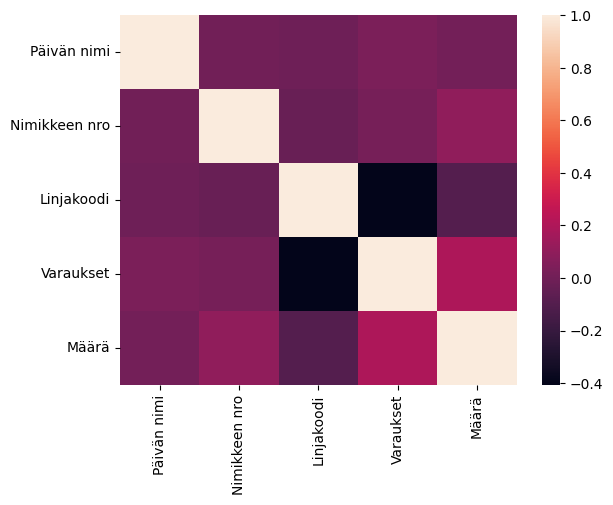

In [ ]:
sns.heatmap(df.corr())

# Jako harjoitus ja testidataan

In [ ]:
X = df.drop(["Määrä", "Perusmittayksikkö",  "Kuvaus", "Kirjauspvm."], axis=1 )
y = df["Määrä"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# Datan skaalaus

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Ristikko haku ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
base_elastic_model = ElasticNet()

In [ ]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [ ]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

# Mallin ennustus

In [ ]:
y_pred = grid_model.predict(scaled_X_test)

# Ennusteen arviointi

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test, y_pred)

3.112201617796073

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.982028422565404

In [ ]:
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

In [ ]:
comparison_df.to_excel("ML_määrien_vertailu_elasticnet.xlsx", index=False)

In [ ]:
comparison_df.head(10)

,Actual,Predicted
9936,2.0,4.004448
8821,1.0,7.025768
3562,2.0,3.731914
107461,5.0,3.359935
44774,1.0,2.546180
92596,2.0,4.852216
49400,5.0,3.354255
29198,1.0,2.701196
57654,3.0,3.553187
85075,2.0,4.966561


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree = DecisionTreeRegressor()

In [ ]:
decision_tree.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = decision_tree.predict(scaled_X_test)

In [ ]:
mae_dt = (mean_absolute_error(y_test, y_pred_dt))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

In [ ]:
rmse_dt

4.403305126872792

In [ ]:
comparison_df_dt = pd.DataFrame({"Actual": y_test, "Predicted dt": y_pred_dt})

In [ ]:
comparison_df_dt.to_excel("ML_määrien_vertailu_dt.xlsx", index=False)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distributions = {
    "n_estimators": [10, 50, 100, 200, 500, 1000],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None] + list(np.arange(5, 51, 5)),
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6],
    "bootstrap": [True, False]
}

In [ ]:
n_iter_search = 100  # number of iterations for random search

In [ ]:
random_forest = RandomForestRegressor()

In [ ]:
random_search = RandomizedSearchCV(
    random_forest,
    param_distributions=param_distributions,
    n_iter=n_iter_search,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring="neg_mean_squared_error",
    random_state=42
    )

In [ ]:
random_search.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
random_search.best_params_
# {'n_estimators': 500,
#  'min_samples_split': 10,
#  'min_samples_leaf': 4,
#  'max_features': 'auto',
#  'max_depth': 35,
#  'bootstrap': True}

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 35,
 'bootstrap': True}

In [ ]:
best_rf = random_search.best_estimator_

In [ ]:
y_pred_rf = best_rf.predict(scaled_X_test)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [ ]:
mae_rf

1.672088162533327

In [ ]:
rmse_rf

3.3069019311147403

In [ ]:
comparison_df_rf = pd.DataFrame({"Actual": y_test, "Predicted rf": y_pred_rf})

In [ ]:
comparison_df_rf.head(10)

,Actual,Predicted rf
9936,2.0,3.634421
8821,1.0,12.832088
3562,2.0,2.355396
107461,5.0,6.292631
44774,1.0,4.803328
92596,2.0,4.271581
49400,5.0,3.968968
29198,1.0,1.430837
57654,3.0,11.154797
85075,2.0,1.511821


In [ ]:
comparison_df_rf.to_excel("ML_määrien_vertailu_random_forest.xlsx", index=False)

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.01,
                          max_depth = 5,
                          n_estimators = 1000,
                          subsample = 0.8,
                          colsample_bytree = 0.8)


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [ ]:
grid_search = GridSearchCV(xg_reg, param_grid, cv=5)

In [ ]:
grid_search.fit(scaled_X_train, y_train)

In [ ]:
grid_search.best_params_
{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 1000,
 'subsample': 1}

In [ ]:
y_pred_xgb = grid_search.predict(scaled_X_test)

In [ ]:
mae_xg = mean_absolute_error(y_test, y_pred_xgb)
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

In [ ]:
mae_xg

In [ ]:
rmse_xg

In [ ]:
comparison_df_xgb = pd.DataFrame({"Actual": y_test, "Predicted xgb": y_pred_xgb})

In [ ]:
comparison_df_xgb.to_excel("ML_määrien_vertailu_xgboost.xlsx", index=False)